In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("1999.xlsx")

In [4]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1999,17498,279,30,3527
1,1999,17779,227,38,3558
2,1999,17772,219,34,3502
3,1999,18000,439,40,3529
4,1999,17236,311,23,3543
...,...,...,...,...,...
1824,1999,17822,269,24,3516
1825,1999,17583,100,22,3530
1826,1999,17962,124,19,3559
1827,1999,17487,331,41,3530


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1829, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1829 non-null   int64
 1   Maximum length (m))  1829 non-null   int64
 2   Recession(m),        1829 non-null   int64
 3   Rate/yr(m)           1829 non-null   int64
 4   Snout altitude (m)   1829 non-null   int64
dtypes: int64(5)
memory usage: 71.6 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))


Number of unique Model Names:  72
Number  of instances of models:  1829


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1999,17498,279,30,3527
1,1999,17779,227,38,3558
2,1999,17772,219,34,3502
3,1999,18000,439,40,3529
4,1999,17236,311,23,3543


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0182,-0.0030,-0.0011
"Recession(m),",NaN,-0.0182,1.0000,-0.0090,0.0102
Rate/yr(m),NaN,-0.0030,-0.0090,1.0000,0.0196
Snout altitude (m),NaN,-0.0011,0.0102,0.0196,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)    -0.0011
Rate/yr(m)            -0.0030
Recession(m),         -0.0182
Year                      NaN
Name: Maximum length (m)), dtype: float64

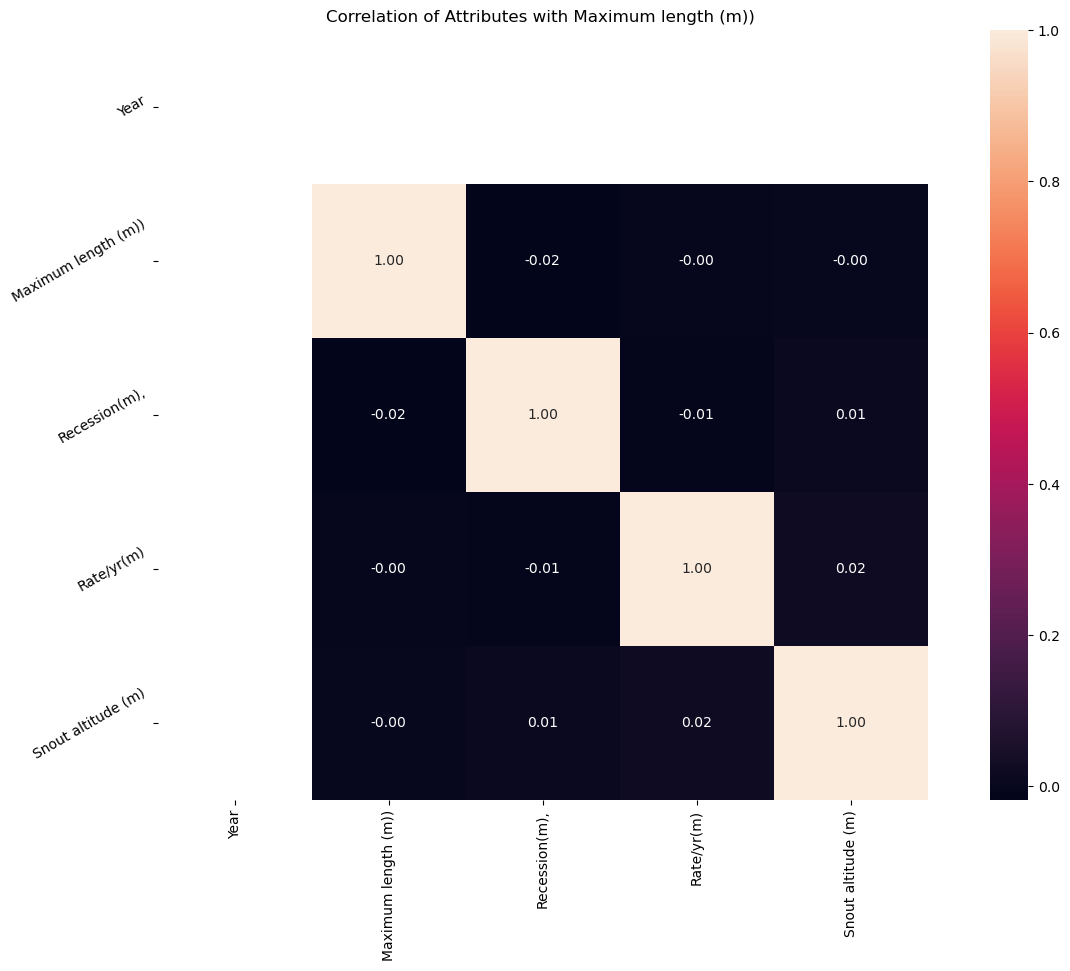

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,829.0000","1,829.0000","1,829.0000","1,829.0000","1,829.0000"
mean,"1,999.0000","17,555.3701",221.5052,27.2630,"3,532.0235"
std,0.0000,299.8918,126.7963,8.5507,20.4413
min,"1,999.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,999.0000","17,296.0000",118.0000,20.0000,"3,514.0000"
50%,"1,999.0000","17,560.0000",220.0000,27.0000,"3,532.0000"
75%,"1,999.0000","17,818.0000",324.0000,34.0000,"3,550.0000"
max,"1,999.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

1999   1.0000
Name: Year, dtype: float64

431   0.0060
191   0.0060
132   0.0055
285   0.0055
118   0.0055
       ...  
401   0.0005
152   0.0005
163   0.0005
320   0.0005
69    0.0005
Name: Recession(m),, Length: 436, dtype: float64

30   0.0459
33   0.0405
13   0.0394
25   0.0388
19   0.0388
18   0.0372
28   0.0366
42   0.0361
31   0.0350
34   0.0344
23   0.0339
21   0.0339
29   0.0334
22   0.0334
36   0.0334
38   0.0334
14   0.0317
15   0.0312
20   0.0312
32   0.0312
26   0.0312
17   0.0312
24   0.0306
16   0.0306
37   0.0301
40   0.0290
27   0.0279
41   0.0273
35   0.0268
39   0.0262
Name: Rate/yr(m), dtype: float64

3561   0.0202
3550   0.0191
3516   0.0191
3556   0.0191
3565   0.0186
        ...  
3499   0.0087
3529   0.0082
3515   0.0082
3549   0.0077
3496   0.0005
Name: Snout altitude (m), Length: 72, dtype: float64



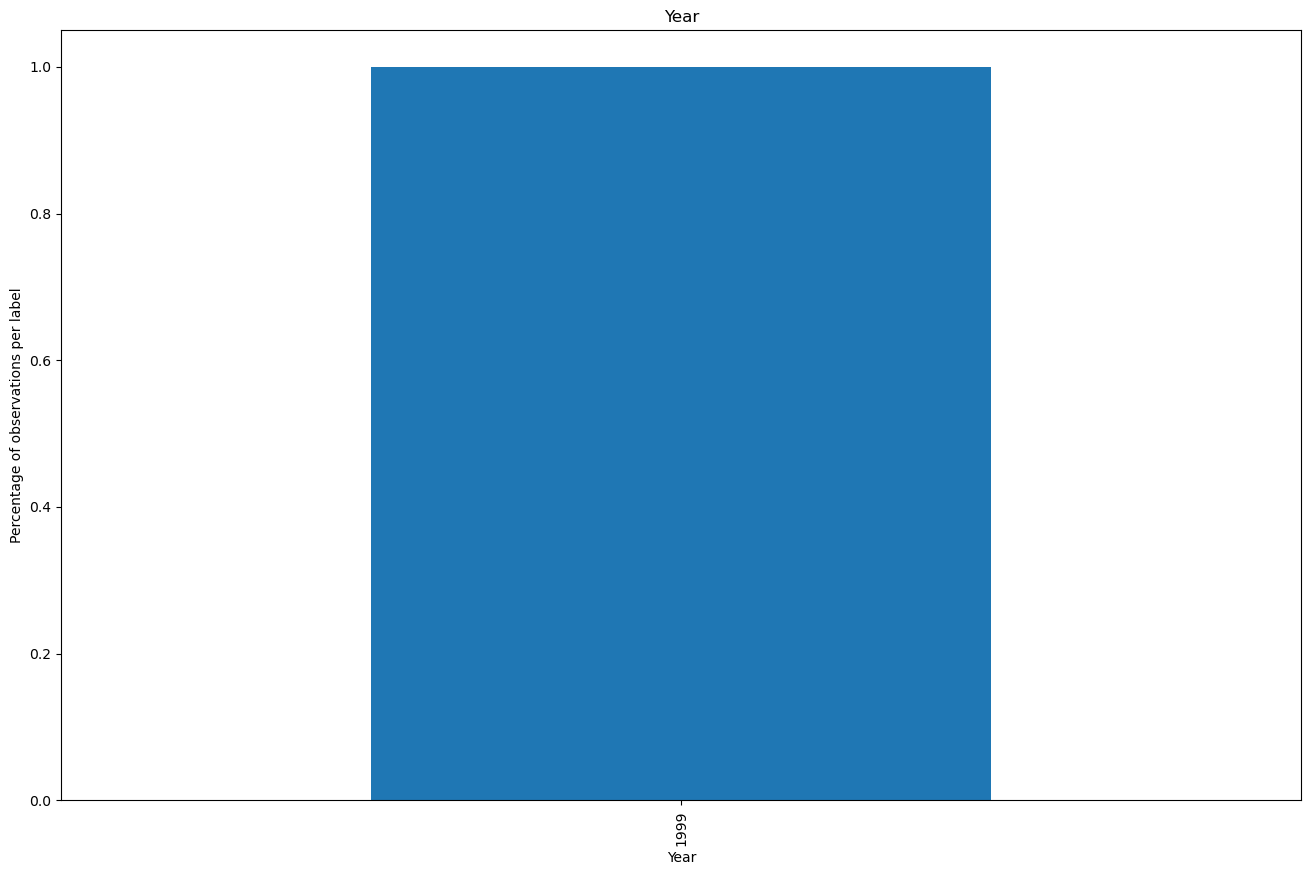

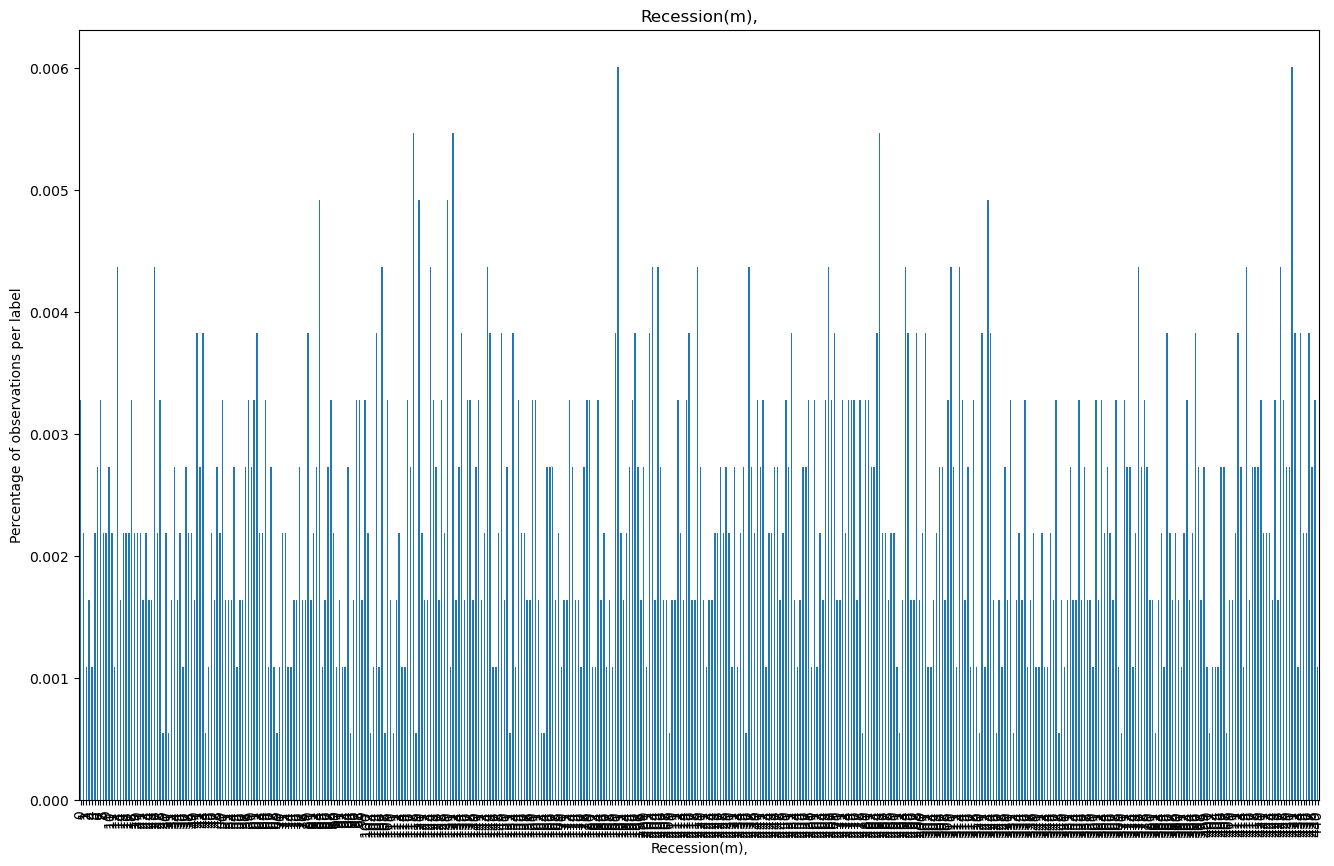

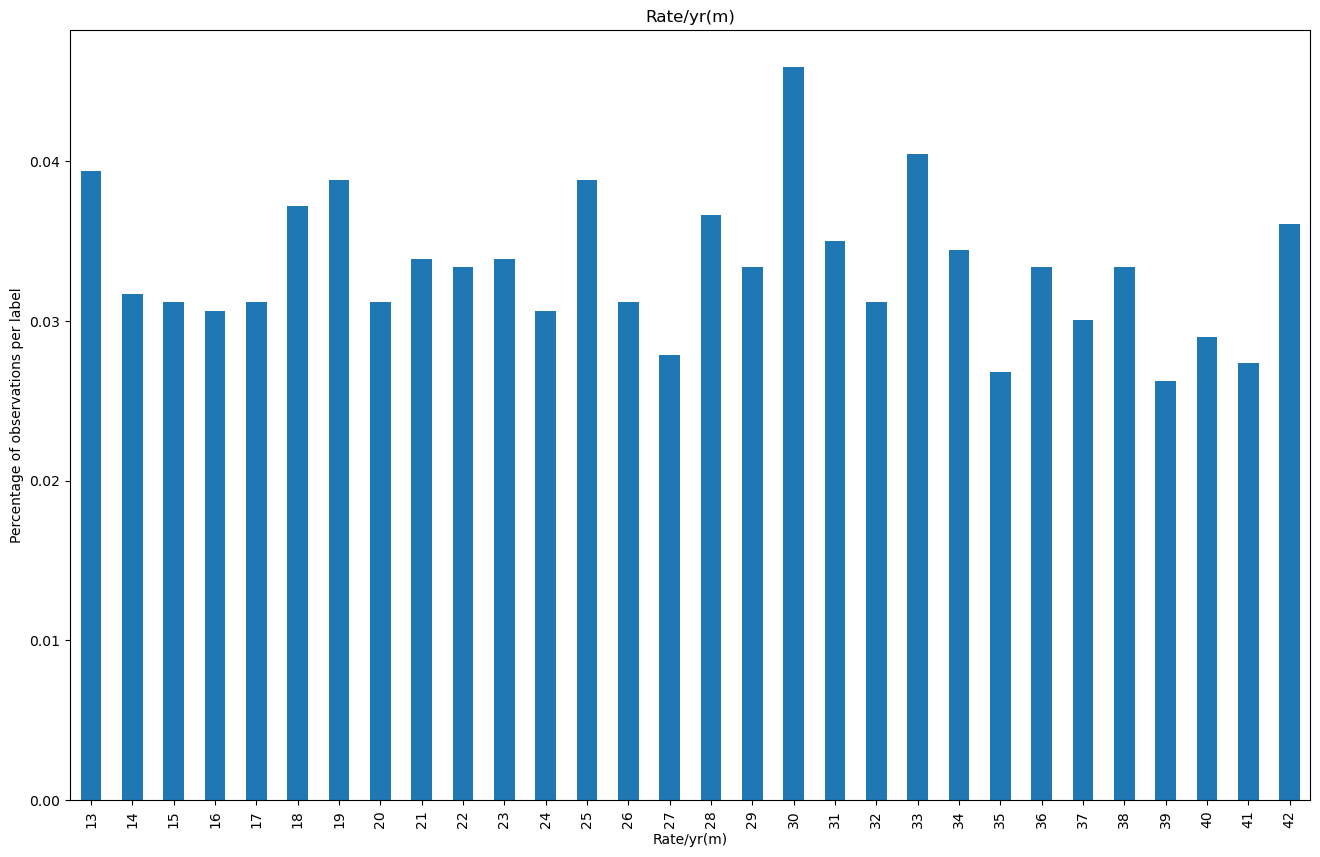

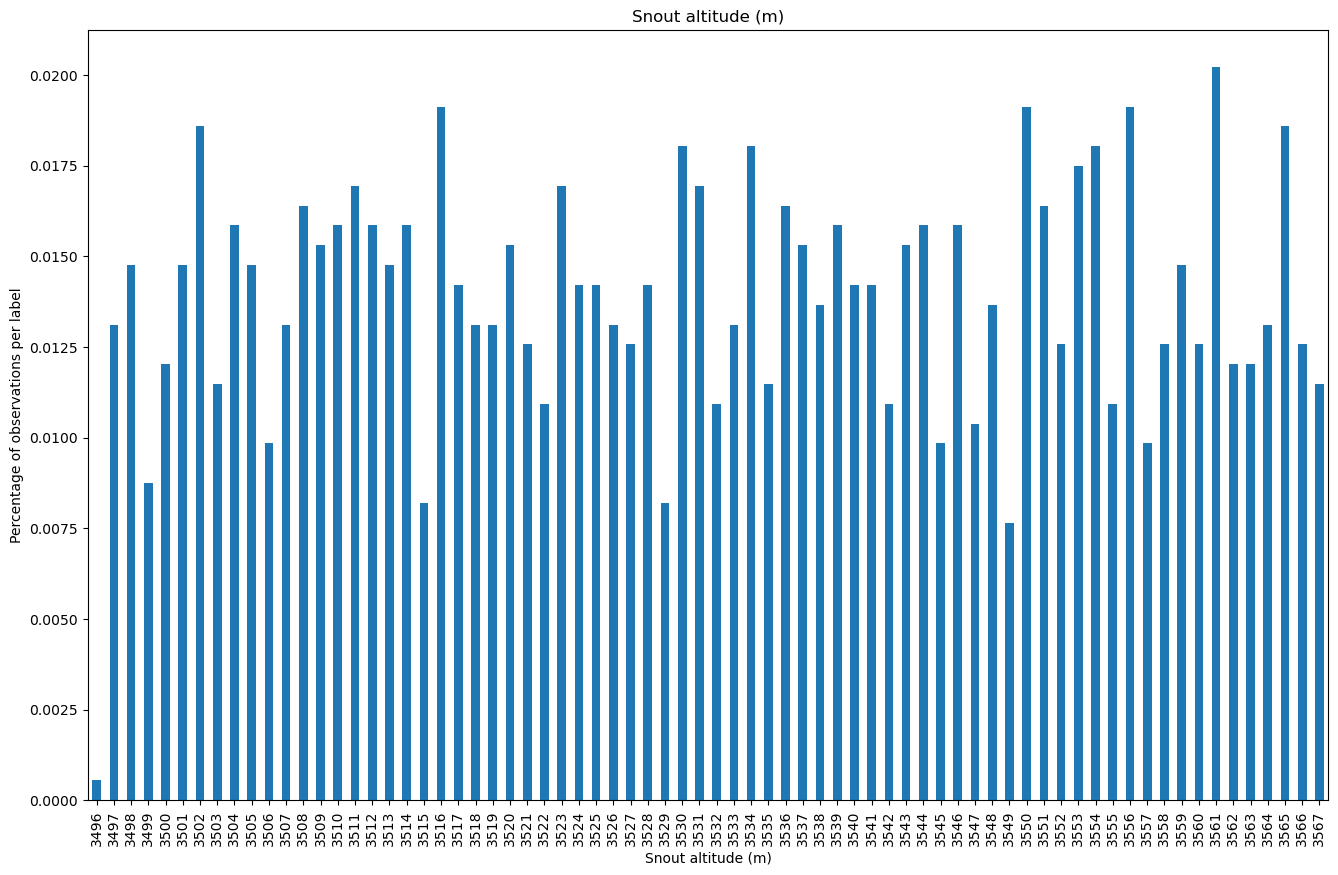

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()